In [1]:
#Array to Audio wav
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt
#audio = Audio(data=ecg_signal, rate=10000)
#audio

In [2]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [12]:
#Write wav files
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16)) #write(name,sr,data)

In [ ]:
#Sampling theorem : len(t) > 2*signal.frequency
#Aliased Signal gets folded to the sampling range , 
#example if 5k is the range , 6k gets folded to 4k , 7k gets folded to 3k , non multiples are folded between the multiples


In [6]:
import scipy.io.wavfile
WAVE_OUTPUT_FILENAME="C:\\Users\\antoz\\Desktop\\takyef_n.wav"
sr , data=scipy.io.wavfile.read(WAVE_OUTPUT_FILENAME)
data=data[:sr*60]

In [10]:
from IPython.display import Audio
import numpy as np
audio = Audio(WAVE_OUTPUT_FILENAME, rate=sr )
audio

In [6]:
def spectrum_spectogram(signal,sr):
    %matplotlib notebook
    amp=np.fft.rfft(signal)
    n=len(signal) #number of samples
    d=1/sr #Space between Samples
    fscale=np.fft.rfftfreq(n , d)
    
    plt.subplot(211)
    plt.tight_layout()
    plt.title('Spectrum')
    plt.plot(fscale,np.abs(amp))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.xlim((0,5000))
    plt.subplot(212)
    plt.tight_layout()
    plt.specgram(signal,Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.show()
    return amp , fscale

<IPython.core.display.Javascript object>


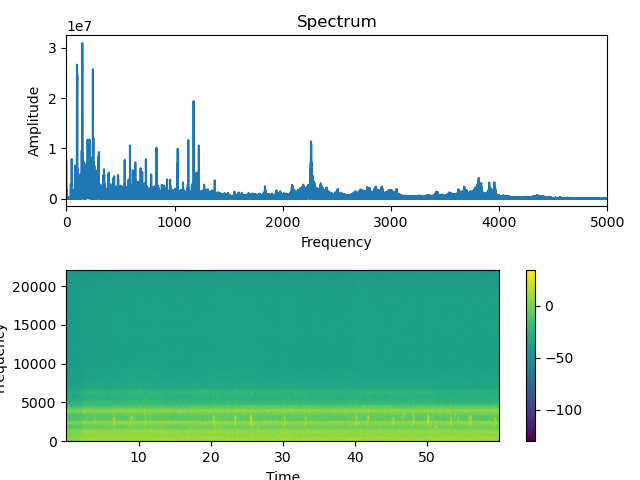

In [33]:
amp , fscale=spectrum_spectogram(data,sr)

In [5]:
import scipy.io.wavfile
WAVE_OUTPUT_FILENAME="C:\\Users\\antoz\\Desktop\\output.wav"
sr , data=scipy.io.wavfile.read(WAVE_OUTPUT_FILENAME)


<IPython.core.display.Javascript object>


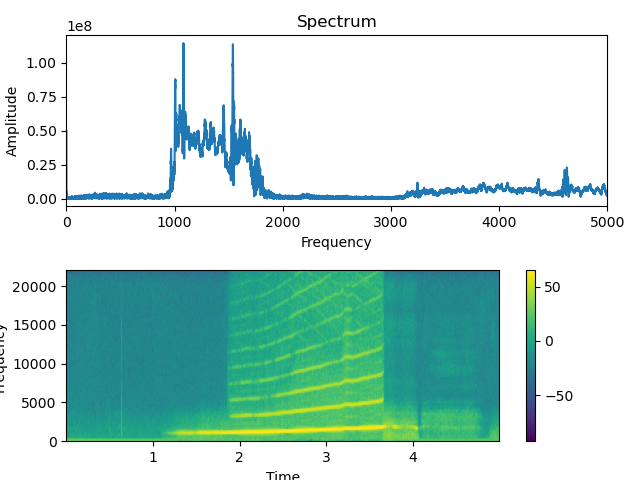

In [7]:
amp , fscale=spectrum_spectogram(data,sr)